Resolver ecuación de Poisson unidimensional con $\rho (x)=\cos(x)$, en el dominio $[0,2 \pi]$, utilizando una malla con 12 puntos. Aquí nuevamente hay 10 incognitas, sin embargo note que para el método es mas conveniente definir $\vec f$ incluyendo las condiciones de frontera.

Para la malla generamos una partición de $[0,2 \pi]$, y las condiciones en $f(0)=0=f(2\pi)$.

Entonces $$f''(x)=cos(x)$$ $$=$$ $$f(x)=-cos(x)+1$$


Usando que $$f(ih)=\frac{u_{i+1}-2u_{i}+u_{i-1}}{h^2}$$, donde $$h=\frac{2\pi}{11}$$ y ya que $$u_{1}=u_{12}=0$$ entonces:
$$-2u_{2}+u_{3}=h^2 f(2h)$$$$u_{2}-2u_{3}+u_{4}=h^2 f(3h)$$$$u_{3}-2u_{4}+u_{5}=h^2 f(4h)$$$$u_{4}-2u_{5}+u_{6}=h^2 f(5h)$$$$u_{5}-2u_{6}+u_{7}=h^2 f(6h)$$$$u_{6}-2u_{7}+u_{8}=h^2 f(7h)$$$$u_{7}-2u_{8}+u_{9}=h^2 f(8h)$$$$u_{8}-2u_{9}+u_{10}=h^2 f(9h)$$$$u_{9}-2u_{10}+u_{11}=h^2 f(10h)$$$$u_{10}-2u_{11}=h^2 f(11h)$$


Con esto obtenemos
$$u_{2}=\frac{1}{2}(u_{3}-h^2 f(2h))$$$$u_{3}=\frac{1}{2}(u_{2}+u_{4}-h^2 f(3h))$$$$u_{4}=\frac{1}{2}(u_{3}+u_{5}-h^2 f(4h))$$$$u_{5}=\frac{1}{2}(u_{4}+u_{6}-h^2 f(5h))$$$$u_{6}=\frac{1}{2}(u_{5}+u_{7}-h^2 f(6h))$$$$u_{7}=\frac{1}{2}(u_{6}+u_{8}-h^2 f(7h))$$$$u_{8}=\frac{1}{2}(u_{7}+u_{9}-h^2 \rho(8h))$$$$u_{9}=\frac{1}{2}(u_{8}+u_{10}-h^2 f(9h))$$$$u_{10}=\frac{1}{2}(u_{9}+u_{11}-h^2 f(10h))$$$$u_{11}=\frac{1}{2}(u_{10}-h^2 f(11h))$$

In [28]:
h=2*pi/11
b=zeros(10);

for i in 1:10
    b[i]=h*h*cos((i+1)*h)
end

b

10-element Array{Float64,1}:
  0.135537 
 -0.0464328
 -0.21366  
 -0.313052 
 -0.313052 
 -0.21366  
 -0.0464328
  0.135537 
  0.274474 
  0.326268 

In [23]:
U=zeros(10,10) 

for i in 1:10
    for j in 1:10   
        if i==j 
            U[i,j]=-2
        elseif i+1==j
            U[j,i]=U[i,j]=1
        end
    end
end
U

10×10 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0

In [24]:
u=inv(U)*b
soluciones=zeros(12)
for i in 2:11
    soluciones[i]=u[i-1]
end

In [25]:
x=linspace(0, 2pi, 12)
y=-cos.(x)+1

12-element Array{Float64,1}:
 0.0     
 0.158746
 0.584585
 1.14231 
 1.65486 
 1.95949 
 1.95949 
 1.65486 
 1.14231 
 0.584585
 0.158746
 0.0     

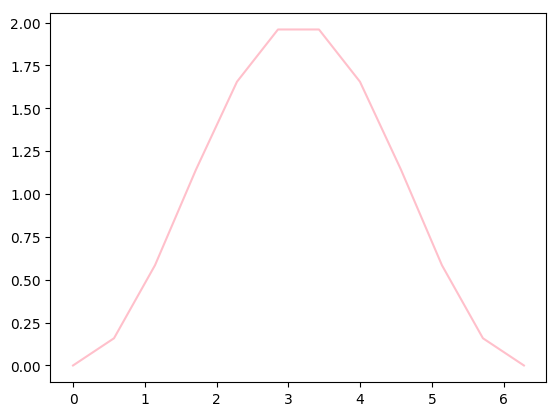

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f04fb407150>

In [26]:
using PyPlot
plot(x,y,"pink")

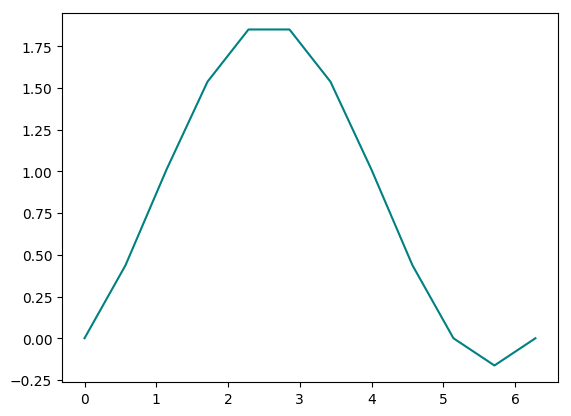

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f04fb88d510>

In [27]:
plot(x,soluciones,"teal")